In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
from statsmodels.stats.diagnostic import het_breuschpagan


df = pd.read_excel('DATA.xlsx')
df = df.rename(columns = {'Field of Technology':'FT','Control de la Corrupción': 'CC','Calidad Regulatoria':'RQ','Estado de Derecho':'LR','Riesgo de Expropiación':'ER'})
df['Dummy'] = df['LegalOrg']
df = pd.get_dummies(df, columns=['Dummy'], drop_first=True, prefix='')
df = df.rename(columns = {'_French':'French','_German':'German','_Scandinavian':'Scandinavian'})
df = df[df['Patents'] > 0]

df.head()

,Country,Code,Year,FT,Patents,Chemistry,Electrical engineering,Instruments,Mechanical engineering,Other fields,...,CapitalHumano,CC,RQ,LR,ER,Porcent,LegalOrg,French,German,Scandinavian
0,Austria,AUT,2014,Chemistry,205,1,0,0,0,0,...,5010.507324,7.933004,7.96434,8.876872,8.475253,1.662861,German,0,1,0
1,Austria,AUT,2014,Electrical engineering,135,0,1,0,0,0,...,5010.507324,7.933004,7.96434,8.876872,8.475253,1.662861,German,0,1,0
2,Austria,AUT,2014,Instruments,111,0,0,1,0,0,...,5010.507324,7.933004,7.96434,8.876872,8.475253,1.662861,German,0,1,0
3,Austria,AUT,2014,Mechanical engineering,308,0,0,0,1,0,...,5010.507324,7.933004,7.96434,8.876872,8.475253,1.662861,German,0,1,0
4,Austria,AUT,2014,Other fields,132,0,0,0,0,1,...,5010.507324,7.933004,7.96434,8.876872,8.475253,1.662861,German,0,1,0


In [2]:
dfreg = df[df['FT']=='Total']

In [3]:
dfreg.head()

,Country,Code,Year,FT,Patents,Chemistry,Electrical engineering,Instruments,Mechanical engineering,Other fields,...,CapitalHumano,CC,RQ,LR,ER,Porcent,LegalOrg,French,German,Scandinavian
5,Austria,AUT,2014,Total,891,0,0,0,0,0,...,5010.507324,7.933004,7.964340,8.876872,8.475253,1.662861,German,0,1,0
11,Austria,AUT,2015,Total,1041,0,0,0,0,0,...,5074.430176,7.944088,7.780894,8.629551,8.468941,1.619005,German,0,1,0
17,Austria,AUT,2016,Total,1370,0,0,0,0,0,...,5401.303711,7.993761,7.857780,8.522924,8.429450,1.600350,German,0,1,0
23,Austria,AUT,2017,Total,1465,0,0,0,0,0,...,5416.893555,8.001640,7.855723,8.600709,8.455204,1.613450,German,0,1,0
29,Austria,AUT,2018,Total,1655,0,0,0,0,0,...,5683.242676,8.137174,8.048073,8.706966,8.506331,1.630865,German,0,1,0


In [4]:
from linearmodels.iv import IVGMM
import numpy as np

formula = 'np.log(Patents) ~ 1 + np.log(ArtCientificos) + np.log(CapitalHumano)'
formula2 = 'np.log(Patents) ~ 1 + np.log(ArtCientificos) + np.log(CapitalHumano) + Porcent'

In [5]:
CC1 = formula + ' + CC'
CC2 = formula2 + ' + CC'
gmm_modelCC = IVGMM.from_formula(CC1, data=dfreg)
gmm_resultadosCC = gmm_modelCC.fit()
gmm_model1CC = IVGMM.from_formula(CC2, data=dfreg)
gmm_resultados1CC = gmm_model1CC.fit()

In [6]:
RQ1 = formula + ' + RQ'
RQ2 = formula2 + ' + RQ'
gmm_modelRQ = IVGMM.from_formula(RQ1, data=dfreg)
gmm_resultadosRQ = gmm_modelRQ.fit()
gmm_model1RQ = IVGMM.from_formula(RQ2, data=dfreg)
gmm_resultados1RQ = gmm_model1RQ.fit()

In [7]:
LR1 = formula + ' + LR'
LR2 = formula2 + ' + LR'
gmm_modelLR = IVGMM.from_formula(LR1, data=dfreg)
gmm_resultadosLR = gmm_modelLR.fit()
gmm_model1LR = IVGMM.from_formula(LR2, data=dfreg)
gmm_resultados1LR = gmm_model1LR.fit()

In [8]:
ER1 = formula + ' + ER'
ER2 = formula2 + ' + ER'
gmm_modelER = IVGMM.from_formula(ER1, data=dfreg)
gmm_resultadosER = gmm_modelER.fit()
gmm_model1ER = IVGMM.from_formula(ER2, data=dfreg)
gmm_resultados1ER = gmm_model1ER.fit()

In [9]:
from linearmodels.iv.results import compare
table = {'(1): CC': gmm_resultadosCC,'(1): RQ': gmm_resultadosRQ,'(1): LR': gmm_resultadosLR,'(1): ER': gmm_resultadosER, '(2): CC': gmm_resultados1CC,'(2): RQ': gmm_resultados1RQ,'(2): LR': gmm_resultados1LR,'(2): ER': gmm_resultados1ER}
tabla = compare(table,stars= True)
tabla_df = pd.read_html(tabla.summary.as_html(), header=0, index_col=0)[0]

In [10]:
tabla_df.to_excel('ResultadosRegresiones\Resultados1.xlsx')

In [11]:
resid1 = gmm_resultadosCC.resids.reset_index(drop=True)
resid2 = gmm_resultadosRQ.resids.reset_index(drop=True)
resid3 = gmm_resultadosLR.resids.reset_index(drop=True)
resid4 = gmm_resultadosER.resids.reset_index(drop=True)

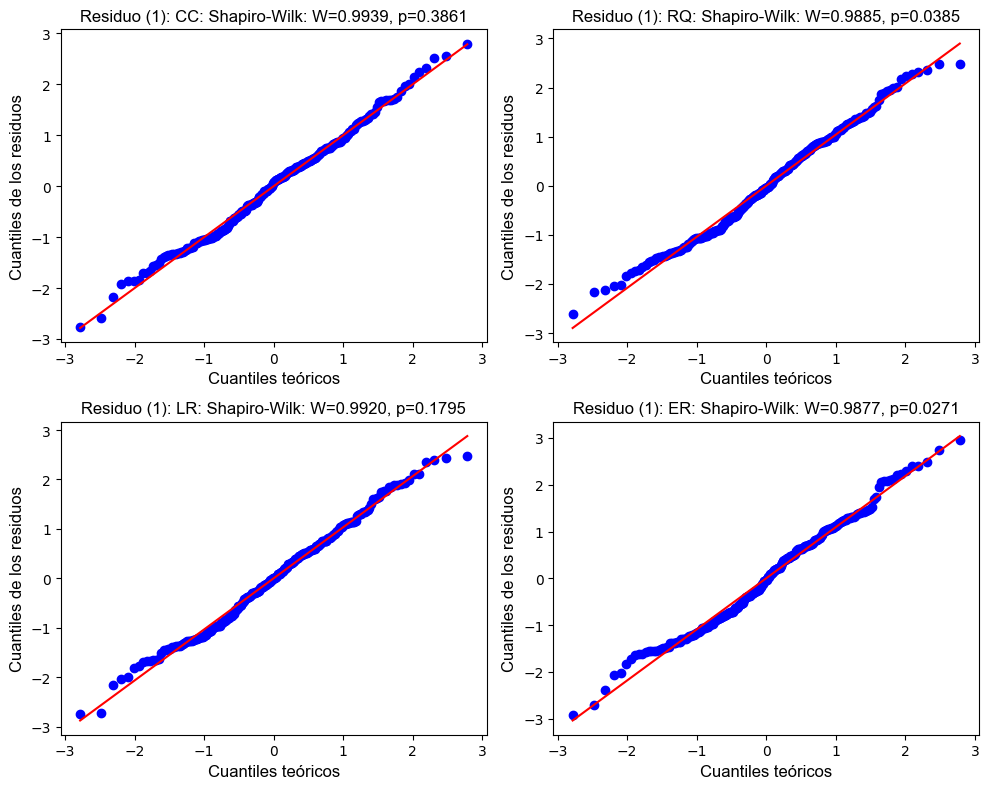

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt

residuals = [resid1, resid2, resid3, resid4]
titles = ["Residuo (1): CC", "Residuo (1): RQ", "Residuo (1): LR", "Residuo (1): ER"]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    stats.probplot(residuals[i], dist="norm", plot=ax)
    
    # Prueba de Shapiro-Wilk
    W, p_value = stats.shapiro(residuals[i])
    
    # Configuración de etiquetas en español
    ax.set_xlabel("Cuantiles teóricos", fontsize=12, fontname="Arial")
    ax.set_ylabel("Cuantiles de los residuos", fontsize=12, fontname="Arial")
    ax.set_title(f"{titles[i]}: Shapiro-Wilk: W={W:.4f}, p={p_value:.4f}", fontname="Arial", fontsize=12)

plt.tight_layout()
plt.savefig('Gráficas/ShapiroWilk.png', dpi=300, bbox_inches='tight')

plt.show()

In [13]:
resid5 = gmm_resultados1CC.resids.reset_index(drop=True)
resid6 = gmm_resultados1RQ.resids.reset_index(drop=True)
resid7 = gmm_resultados1LR.resids.reset_index(drop=True)
resid8 = gmm_resultados1ER.resids.reset_index(drop=True)

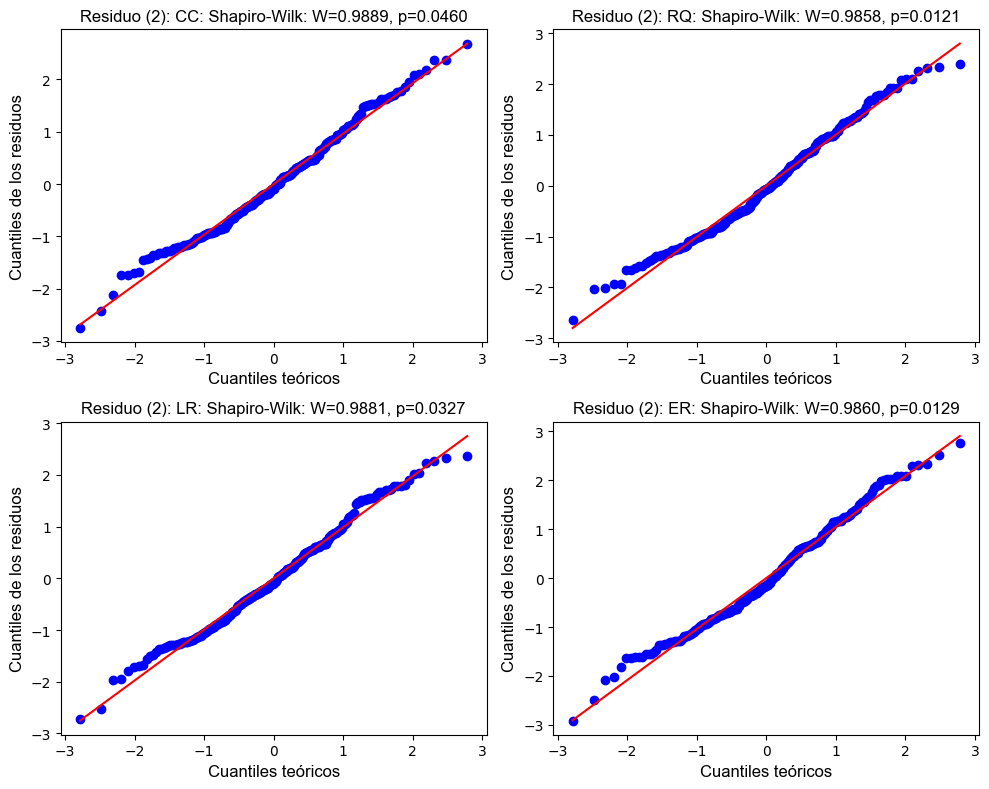

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt

residuals = [resid5, resid6, resid7, resid8]
titles = ["Residuo (2): CC", "Residuo (2): RQ", "Residuo (2): LR", "Residuo (2): ER"]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    stats.probplot(residuals[i], dist="norm", plot=ax)
    
    # Prueba de Shapiro-Wilk
    W, p_value = stats.shapiro(residuals[i])
    
    # Configuración de etiquetas en español
    ax.set_xlabel("Cuantiles teóricos", fontsize=12, fontname="Arial")
    ax.set_ylabel("Cuantiles de los residuos", fontsize=12, fontname="Arial")
    ax.set_title(f"{titles[i]}: Shapiro-Wilk: W={W:.4f}, p={p_value:.4f}", fontname="Arial", fontsize=12)

plt.tight_layout()
plt.savefig('Gráficas/ShapiroWilk2.png', dpi=300, bbox_inches='tight')

plt.show()

In [15]:
exog_vars1 = gmm_modelCC.exog.ndarray
exog_vars2 = gmm_modelRQ.exog.ndarray
exog_vars3 = gmm_modelLR.exog.ndarray
exog_vars4 = gmm_modelER.exog.ndarray
exog_vars5 = gmm_model1CC.exog.ndarray
exog_vars6 = gmm_model1RQ.exog.ndarray
exog_vars7 = gmm_model1LR.exog.ndarray
exog_vars8 = gmm_model1ER.exog.ndarray

exo_vars = [exog_vars1,exog_vars2,exog_vars3,exog_vars4,exog_vars5,exog_vars6,exog_vars7,exog_vars8]
resid = [resid1,resid2,resid3,resid4,resid5,resid6,resid7,resid8]

for i in range(len(resid)):
    bp_test_statistic, bp_p_value, _, _ = het_breuschpagan(resid[i], exo_vars[i])
    
    # Mostrar resultados del test de heterocedasticidad
    print(round(bp_test_statistic,4),round(bp_p_value,4))

14.5435 0.0023
26.9554 0.0
19.5191 0.0002
38.1637 0.0
14.9764 0.0048
25.5942 0.0
18.5108 0.001
34.3825 0.0


# 1. Relevancia del instrumento 

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# Realizar el ANOVA
dfreg['Instituciones'] = (df['CC']+df['RQ']+ df['LR']+df['ER'])/4
model = ols('Instituciones ~ C(LegalOrg)', data=dfreg).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Tipo 2 para ANOVA de modelos lineales
print(anova_table)


                 sum_sq     df          F        PR(>F)
C(LegalOrg)  153.450283    3.0  46.222794  7.463504e-24
Residual     279.969532  253.0        NaN           NaN


C:\Users\Javier\AppData\Local\Temp\ipykernel_20960\2095337691.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreg['Instituciones'] = (df['CC']+df['RQ']+ df['LR']+df['ER'])/4


# 2. Exclusión del instrumento (Test de Hansen)

In [17]:
gmm_modelCCIV = IVGMM.from_formula('np.log(Patents) ~ 1 + np.log(ArtCientificos) + np.log(CapitalHumano)  + Porcent + [CC~French + German + Scandinavian] ', data=dfreg)
gmm_resultsCCIV = gmm_modelCCIV.fit()

gmm_modelLRIV = IVGMM.from_formula('np.log(Patents) ~ 1 + np.log(ArtCientificos) + np.log(CapitalHumano) + Porcent + [LR~French + German + Scandinavian]  ', data=dfreg)
gmm_resultsLRIV = gmm_modelLRIV.fit()

gmm_modelRQIV = IVGMM.from_formula('np.log(Patents) ~ 1 + np.log(ArtCientificos) + np.log(CapitalHumano) + Porcent + [RQ~French + German + Scandinavian]  ', data=dfreg)
gmm_resultsRQIV = gmm_modelRQIV.fit()

gmm_modelERIV = IVGMM.from_formula('np.log(Patents) ~ 1 + np.log(ArtCientificos) + np.log(CapitalHumano) + Porcent + [ER~French + German + Scandinavian]  ', data=dfreg)
gmm_resultsERIV = gmm_modelERIV.fit()

In [18]:
from linearmodels.iv.results import compare
table = {'(IV): CC': gmm_resultsCCIV,'(IV): RQ': gmm_resultsLRIV,'(IV): LR': gmm_resultsRQIV,'(IV): ER': gmm_resultsERIV}
tabla = compare(table,stars= True)
tabla_df2 = pd.read_html(tabla.summary.as_html(), header=0, index_col=0)[0]
tabla_df2.to_excel('ResultadosRegresiones\Resultados2.xlsx')

In [19]:
tabla_df2

,(IV): CC,(IV): RQ,(IV): LR,(IV): ER
Dep. Variable,np.log(Patents),np.log(Patents),np.log(Patents),np.log(Patents)
Estimator,IV-GMM,IV-GMM,IV-GMM,IV-GMM
No. Observations,257,257,257,257
Cov. Est.,robust,robust,robust,robust
R-squared,0.8386,0.8415,0.8340,0.8307
Adj. R-squared,0.8360,0.8390,0.8313,0.8280
F-statistic,1489.7,1533.3,1447.8,1440.4
P-value (F-stat),0.0000,0.0000,0.0000,0.0000
========================,=================,=================,=================,=================
Intercept,-16.372***,-15.730***,-17.449***,-16.375***


In [20]:
gmmresults = [gmm_resultsCCIV,gmm_resultsLRIV,gmm_resultsRQIV,gmm_resultsERIV]
for i in range(len(gmmresults)):
    print(round(gmmresults[i].j_stat.stat,4), round(gmmresults[i].j_stat.pval,4))



2.9839 0.2249
1.9362 0.3798
2.3116 0.3148
2.0618 0.3567


In [21]:
exog_vars1 = gmm_modelCCIV.exog.ndarray
exog_vars2 = gmm_modelRQIV.exog.ndarray
exog_vars3 = gmm_modelLRIV.exog.ndarray
exog_vars4 = gmm_modelERIV.exog.ndarray
resid1 = gmm_resultsCCIV.resids.reset_index(drop=True)
resid2 = gmm_resultsRQIV.resids.reset_index(drop=True)
resid3 = gmm_resultsLRIV.resids.reset_index(drop=True)
resid4 = gmm_resultsERIV.resids.reset_index(drop=True)

exo_vars = [exog_vars1,exog_vars2,exog_vars3,exog_vars4]
resid = [resid1,resid2,resid3,resid4]

for i in range(len(resid)):
    bp_test_statistic, bp_p_value, _, _ = het_breuschpagan(resid[i], exo_vars[i])
    
    # Mostrar resultados del test de heterocedasticidad
    print(round(bp_test_statistic,4),round(bp_p_value,4))

35.452 0.0
35.9839 0.0
28.5832 0.0
38.147 0.0
